# Classification of loan screening data by Machine Learning Model

## Functional Requirements

- This model is possible to use binaly clasificasion
- Specified categorical variable will excute one-hot encoding  
- After preprocessed modeling dataframe, same preprocessing will apply scoring dataframe.
- Chooseable a best model from evaluation indexes
- available to save & load learnd machine learning model
- Visualize Feature importances

## Import libraries

In [1]:
# Basical Library of python analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Missing data process
from sklearn.preprocessing import Imputer
# from sklearn.impute import SimpleImputer (latest version)

# Dimention Reduction
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Unbalanced data process
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE

# Machine Learning Algorithms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

# Evaluation index
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Save & load data
import pickle

C:\Users\kojir\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Import train data & preprocessing

In [2]:
# Import training data of Loan screening
TRAINING_DATASET = pd.read_csv('./av_loan_train_data.csv',header=0)

# Devide explanatory value X & objective value y
X = TRAINING_DATASET.iloc[:, :-1]
ID = X.iloc[:,[0]]
X = X.drop('Loan_ID',axis=1)
y = TRAINING_DATASET.iloc[:, -1]

# Check data information
print('Raw shape: (%i,%i)' %TRAINING_DATASET.shape)
print('X shape: (%i,%i)' %X.shape)

Raw shape: (614,13)
X shape: (614,11)


In [3]:
# Convert stirngs to number of y
# Loan_status are changed to No_samples: 1, Yes_samples: 0
class_mapping = {'N':1, 'Y':0}
y = y.map(class_mapping)

# Check the converted result
print('check the result converted')
print(y.value_counts())
# Check null numbes
print('Check null count : %i' % y.isnull().sum())

check the result converted
0    422
1    192
Name: Loan_Status, dtype: int64
Check null count : 0


In [4]:
# Change option of display colomns number to 50
pd.options.display.max_columns = 50

In [5]:
# Category values will set by list
# "ohe" means "One-Hot Encoding"
ohe_columns = ['Dependents',
                 'Gender',
                 'Married',
                 'Education',
                 'Self_Employed',
                 'Property_Area']

# Prepare for categories value to load "object style"
# Fit data style until one-hot encoding
my_dtype = {'Dependents':object,
                'Gender':object,
                'Married':object,
                'Education':object,
                'Self_Employed':object,
                'Property_Area':object}

# Check dtype of all colomns
print(ID.join(X).join(y).dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object


In [6]:
# one-hot encoding for explanatory values X
# dummy_na=True will process OHE include missing data
X_OHE = pd.get_dummies(X,
                       dummy_na=True,
                       columns=ohe_columns)

print('X_OHE shape:(%i,%i)' % X_OHE.shape)
X_OHE.head()

X_OHE shape:(614,26)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [7]:
# Missing data preprocessing by simple imputer (use mean score)
imp = Imputer()
imp.fit(X_OHE)

# Use learned Imputer : each columns missing data will change to mean score
X_OHE_columns = X_OHE.columns.values
X_OHE = pd.DataFrame(imp.transform(X_OHE), columns=X_OHE_columns)

# Check results
X_OHE.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5849.0,0.0,146.412162,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Dimention Reduction (RFE)
# Select RandomForestClassifier to predict futures importance 
# Reduce future selection from 26 to 10
# Reduction future score is 5% per a step
selector = RFE(RandomForestClassifier(n_estimators=100, random_state=1),
               n_features_to_select=10,
               step=0.05)

selector.fit(X_OHE,y)

X_FINAL = X_OHE.loc[:, X_OHE_columns[selector.support_]]
print('X_FINAL shape:(%i,%i)' % X_FINAL.shape)
X_FINAL.head()

X_FINAL shape:(614,10)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Married_No,Education_Graduate,Property_Area_Rural,Property_Area_Semiurban
0,5849.0,0.0,146.412162,360.0,1.0,1.0,1.0,1.0,0.0,0.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,1.0,0.0,1.0,0.0,0.0
3,2583.0,2358.0,120.000000,360.0,1.0,1.0,0.0,0.0,0.0,0.0
4,6000.0,0.0,141.000000,360.0,1.0,1.0,1.0,1.0,0.0,0.0


## Import test dataset & preprocessing

In [9]:
# Import test dataset
TEST_DATASET = pd.read_csv('./av_loan_test_data.csv',
                           header=0,
                           dtype=my_dtype)

X_TEST  = TEST_DATASET.iloc[:,:]
ID_TEST = TEST_DATASET.iloc[:,[0]]
X_TEST  = TEST_DATASET.drop('Loan_ID',axis=1)

# check the shape
print('Raw shape: (%i,%i)' %TEST_DATASET.shape)
print('X shape: (%i,%i)' %X_TEST.shape)
print(X_TEST.dtypes)
ID_TEST.join(X_TEST).head()

Raw shape: (333,12)
X shape: (333,11)
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
# one-hot encoding for explanatory values X of test data
X_OHE_TEST = pd.get_dummies(X_TEST,
                            dummy_na=True,
                            columns=ohe_columns)
print('X_OHE_TEST shape:(%i,%i)' % X_OHE_TEST.shape)
X_OHE_TEST.head()

X_OHE_TEST shape:(333,26)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_nan,Gender_Female,Gender_Male,Gender_Unknown,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5720,0,110.0,360.0,1.0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,3076,1500,126.0,360.0,1.0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
2,5000,1800,208.0,360.0,1.0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,2340,2546,100.0,360.0,NaN,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [11]:
# Data integrity check after one-hot encoding
cols_model = set(X_OHE.columns.values)
cols_score = set(X_OHE_TEST.columns.values)

diff1 = cols_model - cols_score
print('Columns that exist in MODEL only: %s' % diff1)

diff2 = cols_score - cols_model
print('Columns that exist in SCORE only: %s' % diff2)

Columns that exist in MODEL only: {'Dependents_3+'}
Columns that exist in SCORE only: {'Gender_Unknown'}


In [12]:
df_cols_m = pd.DataFrame(None,
                         columns=X_OHE_columns,
                         dtype=float)
display(df_cols_m)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan


In [13]:
X_ohe_s2 = pd.concat([df_cols_m, X_OHE_TEST])
print(X_ohe_s2.shape)
display(X_ohe_s2.head(3))

(333, 27)


C:\Users\kojir\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Education_nan,Gender_Female,Gender_Male,Gender_Unknown,Gender_nan,LoanAmount,Loan_Amount_Term,Married_No,Married_Yes,Married_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan
0,5720.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,110.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3076.0,1500.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,126.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,5000.0,1800.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,208.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
set_Xm = set(X_OHE.columns.values)
set_Xs = set(X_OHE_TEST.columns.values)

# Gender_Unknown = list(set_Xs - set_Xm)

X_ohe_s3 = X_ohe_s2.drop(list(set_Xs-set_Xm),axis=1)

print(X_ohe_s3.shape)
display(X_ohe_s3.head(3))

(333, 26)


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Education_nan,Gender_Female,Gender_Male,Gender_nan,LoanAmount,Loan_Amount_Term,Married_No,Married_Yes,Married_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan
0,5720.0,0.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,110.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3076.0,1500.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,126.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,5000.0,1800.0,1.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,208.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [15]:
X_ohe_s3.loc[:,list(set_Xm-set_Xs)] = X_ohe_s3.loc[:,list(set_Xm-set_Xs)].fillna(0,axis=1)
X_ohe_s3.head(3)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Education_nan,Gender_Female,Gender_Male,Gender_nan,LoanAmount,Loan_Amount_Term,Married_No,Married_Yes,Married_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan
0,5720.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,110.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3076.0,1500.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,126.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,5000.0,1800.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,208.0,360.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
X_ohe_s3 = X_ohe_s3.reindex(X_OHE.columns.values,axis=1)
X_ohe_s3.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5720.0,0.0,110.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3076.0,1500.0,126.0,360.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000.0,1800.0,208.0,360.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
# Missing data preprocessing by simple imputer
print('missing data number : before process',X_ohe_s3.isnull().sum().sum())
X_ohe_s4 = pd.DataFrame(imp.transform(X_ohe_s3),columns=X_OHE_columns)
print('missing data number : after process',X_ohe_s4.isnull().sum().sum())

missing data number : before process 34
missing data number : after process 0


In [18]:
X_fin_s = X_ohe_s4.loc[:, X_OHE_columns[selector.support_]]
print(X_fin_s.shape)
X_fin_s.head()

(333, 10)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Married_No,Education_Graduate,Property_Area_Rural,Property_Area_Semiurban
0,5720.0,0.0,110.0,360.0,1.000000,1.0,0.0,1.0,0.0,0.0
1,3076.0,1500.0,126.0,360.0,1.000000,0.0,0.0,1.0,0.0,0.0
2,5000.0,1800.0,208.0,360.0,1.000000,0.0,0.0,1.0,0.0,0.0
3,2340.0,2546.0,100.0,360.0,0.842199,0.0,0.0,1.0,0.0,0.0
4,3276.0,0.0,78.0,360.0,1.000000,1.0,1.0,0.0,0.0,0.0


## Correspond to unbalanced data

In [19]:
"""
# random under sampling
RUS = RandomUnderSampler(random_state=1)
X_under, y_under = RUS.fit_sample(X_OHE, y)
Counter(y_under)

# random over sampling & SMOTE
ROS = RandomOverSampler(random_state=1)
SMT = SMOTE(random_state=1)

X_over,y_over = ROS.fit_sample(X_OHE, y)
X_smt,y_smt = SMT.fit_sample(X_OHE, y)

print('Random Over Sampler',Counter(y_over))
print('SMOTE', Counter(y_smt))
"""

"\n# random under sampling\nRUS = RandomUnderSampler(random_state=1)\nX_under, y_under = RUS.fit_sample(X_OHE, y)\nCounter(y_under)\n\n# random over sampling & SMOTE\nROS = RandomOverSampler(random_state=1)\nSMT = SMOTE(random_state=1)\n\nX_over,y_over = ROS.fit_sample(X_OHE, y)\nX_smt,y_smt = SMT.fit_sample(X_OHE, y)\n\nprint('Random Over Sampler',Counter(y_over))\nprint('SMOTE', Counter(y_smt))\n"

## Construct a model pipeline

In [20]:
# holdout
X_train,X_test,y_train,y_test=train_test_split(X_FINAL, y, 
                                               test_size=0.3,
                                               random_state=1)

In [21]:
"""
# resampling
X_train_under, y_train_under = RUS.fit_sample(X_train, y_train) # under sampling
X_train_over, y_train_over = ROS.fit_sample(X_train, y_train) # over sampling
X_train_smt, y_train_smt = SMT.fit_sample(X_train, y_train) # SMOTE
"""

'\n# resampling\nX_train_under, y_train_under = RUS.fit_sample(X_train, y_train) # under sampling\nX_train_over, y_train_over = ROS.fit_sample(X_train, y_train) # over sampling\nX_train_smt, y_train_smt = SMT.fit_sample(X_train, y_train) # SMOTE\n'

In [22]:
# set pipelines for different algorithms
pipelines = {
    'k-nearest Neighbor classification':
        Pipeline([('scl',StandardScaler()),
                  ('est',KNeighborsClassifier())]),
    'Logistic Regression classification':
        Pipeline([('scl',StandardScaler()),
                  ('est',LogisticRegression(random_state=1))]),
    'Robust SVM for classification':
        Pipeline([('scl',StandardScaler()),
                  ('est',SVC(probability=True, 
                             C=1.0, 
                             kernel='rbf', 
                             class_weight='balanced', 
                             random_state=1))]),
    'Liner SVM for classification':
        Pipeline([('scl',StandardScaler()),
                  ('est',LinearSVC(C=1.0, 
                                   class_weight='balanced', 
                                   random_state=1))]),
    'Decision Tree Classifier':
        Pipeline([('scl',StandardScaler()),
                  ('est',DecisionTreeClassifier(random_state=1))]),
    'Random Forest Classifier':
        Pipeline([('scl',StandardScaler()),
                  ('est',RandomForestClassifier(random_state=1))]),
    'Gradient Boosting Classifier':
        Pipeline([('scl',StandardScaler()),
                  ('est',GradientBoostingClassifier(random_state=1))]),
    'Multi-layer Perceptron':
        Pipeline([('scl',StandardScaler()),
                  ('est',MLPClassifier(hidden_layer_sizes=(3,3),
                                       max_iter=1000,
                                       random_state=1))]),
    'Light GBM':
        Pipeline([('scl', StandardScaler()),
                 ('est', lgb.LGBMClassifier(max_depth=-1, 
                                            random_state=1))])
}

## Fit & Score

In [23]:
scores = {}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    scores[(pipe_name,'accuracy_train')] = accuracy_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'accuracy_test')] = accuracy_score(y_test, pipeline.predict(X_test))
    scores[(pipe_name,'precision_train')] = precision_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'precision_test')] = precision_score(y_test, pipeline.predict(X_test))
    scores[(pipe_name,'recall_train')] = recall_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'recall_test')] = recall_score(y_test, pipeline.predict(X_test))
    scores[(pipe_name,'F1_train')] = f1_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'F1_test')] = f1_score(y_test, pipeline.predict(X_test))
    scores[(pipe_name,'AUC_train')] = roc_auc_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name,'AUC_test')] = roc_auc_score(y_test, pipeline.predict(X_test))

SCORES = pd.Series(scores).unstack()
display(SCORES)

C:\Users\kojir\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kojir\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kojir\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kojir\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

,AUC_test,AUC_train,F1_test,F1_train,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train
Decision Tree Classifier,0.661224,1.000000,0.535714,1.000000,0.718919,1.000000,0.588235,1.000000,0.491803,1.000000
Gradient Boosting Classifier,0.705447,0.845650,0.591837,0.816143,0.783784,0.904429,0.783784,0.989130,0.475410,0.694656
Light GBM,0.673057,0.971605,0.543689,0.968750,0.745946,0.981352,0.666667,0.992000,0.459016,0.946565
Liner SVM for classification,0.726005,0.722335,0.627451,0.614719,0.794595,0.792541,0.780488,0.710000,0.524590,0.541985
Logistic Regression classification,0.696854,0.715124,0.568182,0.602041,0.794595,0.818182,0.925926,0.907692,0.409836,0.450382
Multi-layer Perceptron,0.688657,0.712524,0.551724,0.596859,0.789189,0.820513,0.923077,0.950000,0.393443,0.435115
Random Forest Classifier,0.701282,0.967788,0.583333,0.964706,0.783784,0.979021,0.800000,0.991935,0.459016,0.938931
Robust SVM for classification,0.676824,0.770403,0.541667,0.693694,0.762162,0.841492,0.742857,0.846154,0.426230,0.587786
k-nearest Neighbor classification,0.692953,0.731313,0.565217,0.631068,0.783784,0.822844,0.838710,0.866667,0.426230,0.496183


## Visualize Future importances

accuracy = 0.7838
Feature Importances:


<function matplotlib.pyplot.show(*args, **kw)>

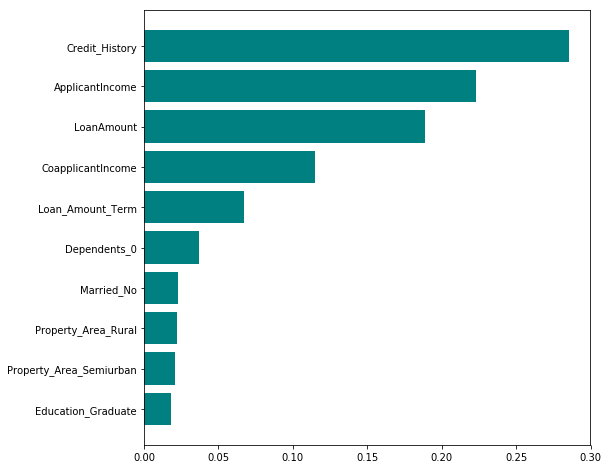

In [24]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)    # predict X_test by RFC

ACCURACY = accuracy_score(y_test, y_pred)
print('accuracy = {:>.4f}'.format(ACCURACY))

Features = X_train.columns
FUTURE_IMPORTANCE = RFC.feature_importances_
indices = np.argsort(FUTURE_IMPORTANCE)
print('Feature Importances:')

plt.figure(figsize=(8, 8))
plt.barh(range(len(indices)), FUTURE_IMPORTANCE[indices], color='teal', align='center')
plt.yticks(range(len(indices)), Features[indices])
plt.show

## Visualize ROC & AUC score

In [25]:
# calculate scores (probability)
y_predict_Logistic = pipelines['Logistic Regression classification'].predict_proba(X_test)[:, 1]
y_predict_Gradient = pipelines['Gradient Boosting Classifier'].predict_proba(X_test)[:, 1]
y_predict_kNN = pipelines['k-nearest Neighbor classification'].predict_proba(X_test)[:, 1]
y_predict_Tree = pipelines['Decision Tree Classifier'].predict_proba(X_test)[:, 1]
y_predict_RFC = pipelines['Random Forest Classifier'].predict_proba(X_test)[:, 1]
y_predict_MLP = pipelines['Multi-layer Perceptron'].predict_proba(X_test)[:, 1]
y_predict_RSVM = pipelines['Robust SVM for classification'].predict_proba(X_test)[:, 1]

In [26]:
# Linear SVC does not work predict proba directly so use CalibratedClassifireCV
from sklearn.calibration import CalibratedClassifierCV

isotonic_svc = CalibratedClassifierCV(
    base_estimator=SVC(probability=False),
    method='isotonic')

isotonic_svc.fit(X_train, y_train)
y_predict_LSVM = isotonic_svc.predict_proba(X_test)[:, 1]
SCORE = roc_auc_score(y_test, pipelines['Multi-layer Perceptron'].predict_proba(X_test)[:,1])
SCORE

0.6677683765203595

In [27]:
# calculate FPR, TPR
fpr_logistic, tpr_logistic, thresholds_logistic = metrics.roc_curve(y_test, y_predict_Logistic)
fpr_gradient, tpr_gradient, thresholds_gradient = metrics.roc_curve(y_test, y_predict_Gradient)
fpr_kNN, tpr_kNN, thresholds_kNN = metrics.roc_curve(y_test, y_predict_kNN)
fpr_Tree, tpr_Tree, thresholds_Tree = metrics.roc_curve(y_test, y_predict_Tree)
fpr_RFC, tpr_RFC, thresholds_RFC = metrics.roc_curve(y_test, y_predict_RFC)
fpr_MLP, tpr_MLP, thresholds_MLP = metrics.roc_curve(y_test, y_predict_MLP)

# SVM
fpr_RSVM, tpr_RSVM, thresholds_RSVM = metrics.roc_curve(y_test, y_predict_RSVM)
fpr_LSVM, tpr_LSVM, thresholds_LSVM = metrics.roc_curve(y_test, y_predict_LSVM)

In [28]:
# calculate AUC
auc_logistic = metrics.auc(fpr_logistic, tpr_logistic)
auc_gradient = metrics.auc(fpr_gradient, tpr_gradient)
auc_kNN = metrics.auc(fpr_kNN, tpr_kNN)
auc_Tree = metrics.auc(fpr_Tree, tpr_Tree)
auc_RFC = metrics.auc(fpr_RFC, tpr_RFC)
auc_MLP = metrics.auc(fpr_MLP, tpr_MLP)

# SVM
auc_RSVM = metrics.auc(fpr_RSVM, tpr_RSVM)
auc_LSVM = metrics.auc(fpr_LSVM, tpr_LSVM)

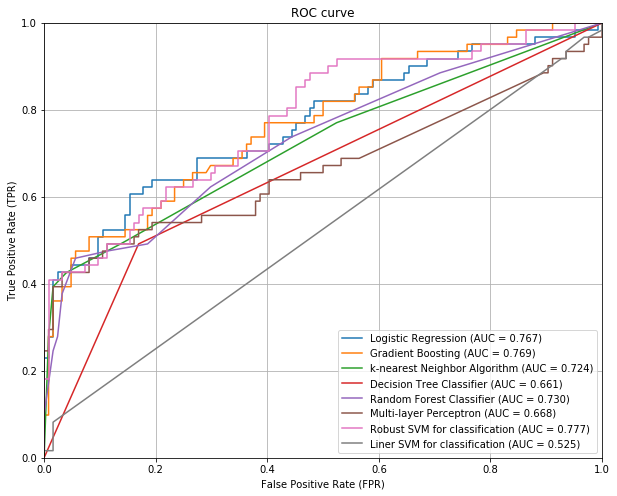

In [29]:
# plot ROC curves
plt.figure(figsize=(10,8))

plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %.3f)'%auc_logistic)
plt.plot(fpr_gradient, tpr_gradient, label='Gradient Boosting (AUC = %.3f)'%auc_gradient)
plt.plot(fpr_kNN, tpr_kNN, label='k-nearest Neighbor Algorithm (AUC = %.3f)'%auc_kNN)
plt.plot(fpr_Tree, tpr_Tree, label='Decision Tree Classifier (AUC = %.3f)'%auc_Tree)
plt.plot(fpr_RFC, tpr_RFC, label='Random Forest Classifier (AUC = %.3f)'%auc_RFC)
plt.plot(fpr_MLP, tpr_MLP, label='Multi-layer Perceptron (AUC = %.3f)'%auc_MLP)
# SVM
plt.plot(fpr_RSVM, tpr_RSVM, label='Robust SVM for classification (AUC = %.3f)'%auc_RSVM)
plt.plot(fpr_LSVM, tpr_LSVM, label='Liner SVM for classification (AUC = %.3f)'%auc_LSVM)
plt.legend()
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()

## Save & load data

In [30]:
# Save data

# Learned model
filename = 'LEARNED_MODEL.pkl'
pickle.dump(pipelines, open(filename, 'wb'))

# Test ID columns
filename = 'ID_TEST_DATA.pkl'
pickle.dump(ID_TEST, open(filename, 'wb'))

# Preprocessed test data
filename = 'PREPROCESSED_TEST_DATA.pkl'
pickle.dump(X_fin_s, open(filename, 'wb'))

In [31]:
# Load data

# Learned model 
filename = 'LEARNED_MODEL.pkl'
LOADED_PIPELINE = pickle.load(open(filename, 'rb'))
print(LOADED_PIPELINE)

# Test ID columns
filename = 'ID_TEST_DATA.pkl'
ID_TEST_DATA= pickle.load(open(filename, 'rb'))
print('ID_TEST_DATA: (%i,%i)' %ID_TEST_DATA.shape)
ID_TEST_DATA.head()

# Preprocessed test data
filename = 'PREPROCESSED_TEST_DATA.pkl'
PREPROCESSED_TEST_DATA = pickle.load(open(filename, 'rb'))
print('PREPROCESSED TEST DATA: (%i,%i)' %PREPROCESSED_TEST_DATA.shape)
PREPROCESSED_TEST_DATA.head()

{'k-nearest Neighbor classification': Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]), 'Logistic Regression classification': Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]), 'Robust SVM for classification': Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rb

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Married_No,Education_Graduate,Property_Area_Rural,Property_Area_Semiurban
0,5720.0,0.0,110.0,360.0,1.000000,1.0,0.0,1.0,0.0,0.0
1,3076.0,1500.0,126.0,360.0,1.000000,0.0,0.0,1.0,0.0,0.0
2,5000.0,1800.0,208.0,360.0,1.000000,0.0,0.0,1.0,0.0,0.0
3,2340.0,2546.0,100.0,360.0,0.842199,0.0,0.0,1.0,0.0,0.0
4,3276.0,0.0,78.0,360.0,1.000000,1.0,1.0,0.0,0.0,0.0


## Final performance evaluation

In [32]:
# predict proba of Gradient Boosting Classifier
LOGISTIC_PREDICT = LOADED_PIPELINE['Gradient Boosting Classifier'].predict_proba(PREPROCESSED_TEST_DATA)
LOGISTIC_PREDICT[:10]

# change format from numpy list to pandas data file
FINAL_PREDICT = pd.DataFrame(LOGISTIC_PREDICT)

print('Final predict: (%i,%i)' %FINAL_PREDICT.shape)
FINAL_PREDICT.head()

Final predict: (333,2)


,0,1
0,0.845833,0.154167
1,0.914490,0.085510
2,0.797035,0.202965
3,0.894276,0.105724
4,0.771058,0.228942


## Upload final results to CSV file

In [33]:
# Unify datafile
df_concat = pd.concat([ID_TEST_DATA, FINAL_PREDICT], axis=1)
# drop 0 from datafile
aijc3318 = df_concat.drop([0],axis=1)
aijc3318.head()

,Loan_ID,1
0,LP001015,0.154167
1,LP001022,0.085510
2,LP001031,0.202965
3,LP001035,0.105724
4,LP001051,0.228942


In [34]:
# Save CSV file
pd.DataFrame(aijc3318).to_csv('Final_result.csv', index=False)